In [1]:
import numpy as np
import pandas as pd
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from fastai.structured import *
import matplotlib.pyplot as plt
import os
import glob

In [2]:
path = r'C:\Users\Marcin\PycharmProjects\inz\venv'
all_files = glob.glob(path + "/*.csv")

In [3]:
li = []
for filename in all_files:
    df = pd.read_csv(filename, sep=',', header=1, low_memory=False) #read csv
    li.append(df)

In [4]:
crypto_data = pd.concat(li, axis=0, ignore_index=True)

In [5]:
crypto_data = crypto_data.drop(columns=['Unix Timestamp'])

In [6]:
crypto_data.dtypes

Date       object
Symbol     object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [40]:
crypto_data['Date'] = pd.to_datetime(crypto_data['Date'])
#crypto_data['Date'] = pd.to_numeric(crypto_data['Date'])

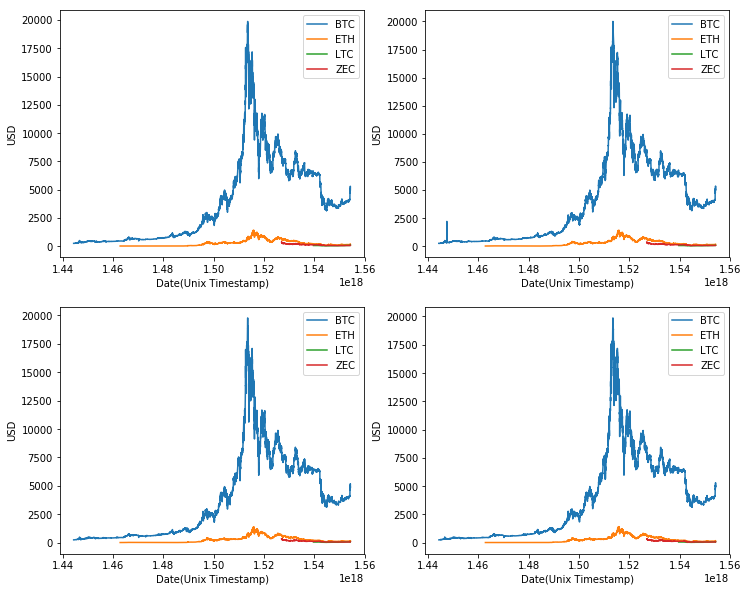

In [8]:
#btc - 30563
#eth - 55991
#ltc - 60059
#zec - 67655

fig = plt.figure(1, figsize=(12,10))
for i in range(2, 6):
    tmp_fig = fig.add_subplot(2,2,i-1)
    plt.plot(crypto_data.iloc[:30563, 0], crypto_data.iloc[:30563, i], label="BTC") #Open
    plt.plot(crypto_data.iloc[30564:55991, 0], crypto_data.iloc[30564:55991, i], label="ETH")
    plt.plot(crypto_data.iloc[55992:60059, 0], crypto_data.iloc[55992:60059, i], label="LTC")
    plt.plot(crypto_data.iloc[60060:67655, 0], crypto_data.iloc[60060:67655, i], label="ZEC")
    plt.legend()
    plt.ylabel('USD')
    plt.xlabel('Date(Unix Timestamp)')

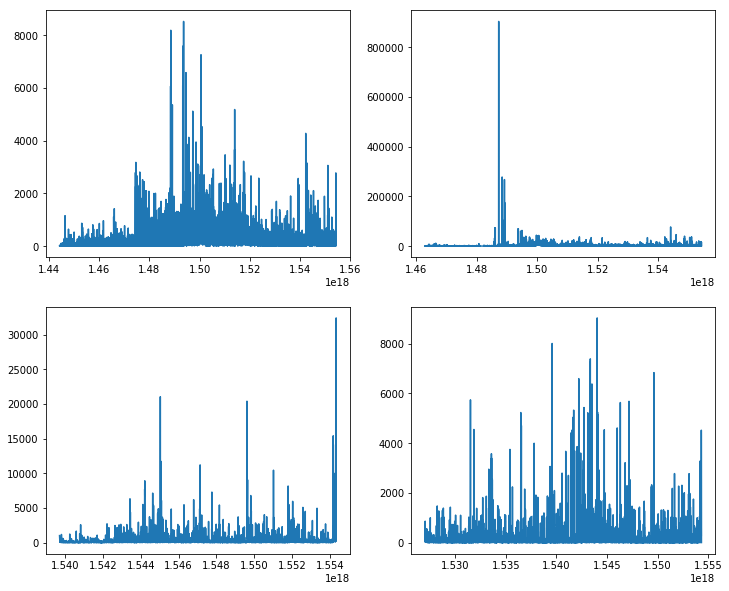

In [9]:
fig = plt.figure(1, figsize=(12,10))

tmp_fig = fig.add_subplot(2,2,1)
plt.plot(crypto_data.iloc[:30563, 0], crypto_data.iloc[:30563, 6], label="BTC") #Open
tmp_fig = fig.add_subplot(2,2,2)
plt.plot(crypto_data.iloc[30564:55991, 0], crypto_data.iloc[30564:55991, 6], label="ETH")
tmp_fig = fig.add_subplot(2,2,3)
plt.plot(crypto_data.iloc[55992:60059, 0], crypto_data.iloc[55992:60059, 6], label="LTC")
tmp_fig = fig.add_subplot(2,2,4)
plt.plot(crypto_data.iloc[60060:67655, 0], crypto_data.iloc[60060:67655, 6], label="ZEC")

In [10]:
crypto_data.head()

Date  Symbol     Open     High      Low    Close  \
0  1554336000000000000  BTCUSD  4976.94  4977.20  4939.53  4940.89   
1  1554332400000000000  BTCUSD  5113.50  5113.50  4800.00  4976.94   
2  1554328800000000000  BTCUSD  5188.41  5266.70  4975.00  5113.50   
3  1554325200000000000  BTCUSD  5293.76  5346.68  5180.04  5188.41   
4  1554321600000000000  BTCUSD  5140.62  5319.81  5140.62  5293.76   

        Volume  
0    17.553291  
1  2331.356847  
2  1632.587373  
3   350.507383  
4  1005.936609

In [11]:
crypto_data.T

0                    1                    2      \
Date    1554336000000000000  1554332400000000000  1554328800000000000   
Symbol               BTCUSD               BTCUSD               BTCUSD   
Open                4976.94               5113.5              5188.41   
High                 4977.2               5113.5               5266.7   
Low                 4939.53                 4800                 4975   
Close               4940.89              4976.94               5113.5   
Volume              17.5533              2331.36              1632.59   

                      3                    4                    5      \
Date    1554325200000000000  1554321600000000000  1554318000000000000   
Symbol               BTCUSD               BTCUSD               BTCUSD   
Open                5293.76              5140.62              5140.38   
High                5346.68              5319.81               5176.3   
Low                 5180.04              5140.62              5128.49   
Close               5188.41              5293.76              5140.62   
Volume              350.507              1005.94              152.446   

                      6                    7                    8      \
Date    1554314400000000000  1554310800000000000  1554307200000000000   
Symbol               BTCUSD               BTCUSD               BTCUSD   
Open                5128.64              5123.26              5012.75   
High                5188.92              5185.57              5147.07   
Low                  5124.7               5076.6              5012.74   
Close               5140.38              5128.64              5123.26   
Volume              165.682              456.049               1519.1   

                      9      ...                67646                67647  \
Date    1554303600000000000  ...  1527026400000000000  1527022800000000000   
Symbol               BTCUSD  ...               ZECUSD               ZECUSD   
Open                5012.76  ...                  310               319.71   
High                5029.37  ...                318.1                  320   
Low                    5000  ...               307.77                  310   
Close               5012.75  ...               309.37                  310   
Volume              104.733  ...              308.991              534.548   

                      67648                67649                67650  \
Date    1527019200000000000  1527015600000000000  1527012000000000000   
Symbol               ZECUSD               ZECUSD               ZECUSD   
Open                 321.96               333.71               336.96   
High                 325.46               333.71               336.96   
Low                  316.94                  320                  332   
Close                319.71               321.96               333.71   
Volume              338.475              337.994              80.1702   

                      67651                67652                67653  \
Date    1527008400000000000  1527004800000000000  1527001200000000000   
Symbol               ZECUSD               ZECUSD               ZECUSD   
Open                    340               341.89               334.87   
High                 340.17               345.43               347.03   
Low                  335.06               337.54                  332   
Close                336.96                  340               341.89   
Volume              149.749              263.286              270.744   

                      67654                67655  
Date    1526997600000000000  1526994000000000000  
Symbol               ZECUSD               ZECUSD  
Open                    341                    0  
High                 343.47               351.99  
Low                     333                    0  
Close                334.87                  341  
Volume              316.097              1608.27  

[7 rows x 67656 columns]

In [49]:
crypto_data.iloc[0:2,:]

Date  Symbol     Open    High      Low    Close       Volume
0 2019-04-04 00:00:00  BTCUSD  4976.94  4977.2  4939.53  4940.89    17.553291
1 2019-04-03 23:00:00  BTCUSD  5113.50  5113.5  4800.00  4976.94  2331.356847

In [63]:
crypto_data.iloc[0,0]

Timestamp('2019-04-04 00:00:00')

In [64]:
b = crypto_data.iloc[0:2,:]

b.insert(8, 'Date', crypto_data.iloc[0,0])
b


ValueError: cannot insert Date, already exists

In [47]:
a = crypto_data.pivot(index='Date', columns='Symbol')
a

Open                           High                 \
Symbol                BTCUSD  ETHUSD LTCUSD ZECUSD   BTCUSD  ETHUSD LTCUSD   
Date                                                                         
2015-10-08 13:00:00     0.00     NaN    NaN    NaN   245.00     NaN    NaN   
2015-10-08 14:00:00   245.00     NaN    NaN    NaN   245.00     NaN    NaN   
2015-10-08 15:00:00   245.00     NaN    NaN    NaN   245.00     NaN    NaN   
2015-10-08 16:00:00   244.92     NaN    NaN    NaN   244.92     NaN    NaN   
2015-10-08 17:00:00   244.25     NaN    NaN    NaN   244.99     NaN    NaN   
2015-10-08 18:00:00   244.99     NaN    NaN    NaN   244.99     NaN    NaN   
2015-10-08 19:00:00   244.00     NaN    NaN    NaN   244.00     NaN    NaN   
2015-10-08 20:00:00   244.00     NaN    NaN    NaN   244.00     NaN    NaN   
2015-10-08 21:00:00   244.00     NaN    NaN    NaN   244.00     NaN    NaN   
2015-10-08 22:00:00   243.95     NaN    NaN    NaN   244.00     NaN    NaN   
2015-10-08 23:00:00   243.95     NaN    NaN    NaN   243.95     NaN    NaN   
2015-10-09 00:00:00   243.95     NaN    NaN    NaN   243.95     NaN    NaN   
2015-10-09 01:00:00   243.60     NaN    NaN    NaN   243.60     NaN    NaN   
2015-10-09 02:00:00   243.60     NaN    NaN    NaN   243.60     NaN    NaN   
2015-10-09 03:00:00   243.60     NaN    NaN    NaN   243.60     NaN    NaN   
2015-10-09 04:00:00   243.60     NaN    NaN    NaN   243.60     NaN    NaN   
2015-10-09 05:00:00   243.60     NaN    NaN    NaN   243.60     NaN    NaN   
2015-10-09 06:00:00   243.60     NaN    NaN    NaN   243.60     NaN    NaN   
2015-10-09 07:00:00   243.60     NaN    NaN    NaN   243.60     NaN    NaN   
2015-10-09 08:00:00   243.60     NaN    NaN    NaN   243.60     NaN    NaN   
2015-10-09 09:00:00   243.60     NaN    NaN    NaN   243.60     NaN    NaN   
2015-10-09 10:00:00   243.60     NaN    NaN    NaN   243.60     NaN    NaN   
2015-10-09 11:00:00   243.60     NaN    NaN    NaN   243.75     NaN    NaN   
2015-10-09 12:00:00   243.63     NaN    NaN    NaN   243.63     NaN    NaN   
2015-10-09 13:00:00   243.63     NaN    NaN    NaN   244.00     NaN    NaN   
2015-10-09 14:00:00   244.00     NaN    NaN    NaN   244.00     NaN    NaN   
2015-10-09 15:00:00   244.00     NaN    NaN    NaN   244.00     NaN    NaN   
2015-10-09 16:00:00   244.00     NaN    NaN    NaN   244.00     NaN    NaN   
2015-10-09 17:00:00   244.00     NaN    NaN    NaN   244.00     NaN    NaN   
2015-10-09 18:00:00   243.70     NaN    NaN    NaN   243.70     NaN    NaN   
...                      ...     ...    ...    ...      ...     ...    ...   
2019-04-02 19:00:00  4738.99  158.33  71.47  66.81  4772.18  161.63  73.42   
2019-04-02 20:00:00  4765.83  161.13  72.97  68.64  4827.97  162.76  73.60   
2019-04-02 21:00:00  4804.96  159.83  72.90  68.11  4838.51  161.54  73.95   
2019-04-02 22:00:00  4789.14  160.21  73.00  68.02  4829.42  163.00  74.00   
2019-04-02 23:00:00  4829.42  163.00  74.00  68.97  4946.60  167.47  79.16   
2019-04-03 00:00:00  4903.80  164.67  77.39  70.53  4997.66  171.15  84.68   
2019-04-03 01:00:00  4978.97  169.69  83.40  72.47  4988.83  169.69  83.43   
2019-04-03 02:00:00  4970.00  168.38  83.13  72.70  5076.00  177.43  85.02   
2019-04-03 03:00:00  5072.45  176.43  84.68  75.00  5089.99  176.64  84.71   
2019-04-03 04:00:00  5055.00  173.08  83.35  73.51  5055.00  173.08  83.35   
2019-04-03 05:00:00  4915.93  166.07  79.18  70.02  4970.98  168.27  81.27   
2019-04-03 06:00:00  4955.82  167.00  80.86  72.01  4977.67  167.75  81.27   
2019-04-03 07:00:00  4974.55  167.08  81.09  72.32  4991.48  170.00  82.76   
2019-04-03 08:00:00  4962.68  167.70  80.92  70.07  4970.61  167.70  81.72   
2019-04-03 09:00:00  4957.82  166.92  81.60  71.17  4975.00  168.10  82.33   
2019-04-03 10:00:00  4975.00  167.93  82.33  71.69  4981.89  168.02  82.64   
2019-04-03 11:00:00  4953.51  166.71  81.47  72.61  4986.69  168.27  83.42   
2019-04-03 12:00:00  4968.02  167.66  82.88  7

In [11]:
train_cats(crypto_data)

In [18]:
crypto_data.dtypes

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [13]:
#change cat to objects
crypto_data.Symbol.cat.categories

Index(['BTCUSD', 'ETHUSD', 'LTCUSD', 'ZECUSD'], dtype='object')

In [14]:
crypto_data.Symbol.cat.set_categories(['BTCUSD', 'ETHUSD', 'LTCUSD', 'ZECUSD'], ordered=True, inplace=True)

In [15]:
crypto_data.Symbol = crypto_data.Symbol.cat.codes

In [16]:
crypto_data.head()

Date  Symbol     Open     High      Low    Close  \
0  1554336000000000000       0  4976.94  4977.20  4939.53  4940.89   
1  1554332400000000000       0  5113.50  5113.50  4800.00  4976.94   
2  1554328800000000000       0  5188.41  5266.70  4975.00  5113.50   
3  1554325200000000000       0  5293.76  5346.68  5180.04  5188.41   
4  1554321600000000000       0  5140.62  5319.81  5140.62  5293.76   

        Volume  
0    17.553291  
1  2331.356847  
2  1632.587373  
3   350.507383  
4  1005.936609

In [17]:
crypto_data['coins_mean'] = crypto_data[['High', 'Low']].mean(axis=1)

In [18]:
tmp_data = crypto_data.copy()
tmp_data = tmp_data.drop(columns=['Open', 'High', 'Low', 'Close'])
tmp_data.head()
df, y, nas = proc_df(tmp_data, 'coins_mean')
x_train2, x_test2, y_train2, y_test2 = train_test_split(df, y, test_size=0.2, random_state=42)
regr1 = RandomForestRegressor(max_depth=3, n_estimators=100)
regr1.fit(x_train2, y_train2)
print(regr1.feature_importances_)
regr1.score(x_train2, y_train2)

[0.60745 0.39176 0.00079]


0.8390661360902956

In [19]:
os.makedirs('tmp', exist_ok=True)
crypto_data.to_feather('tmp/crypto_data') #saving file 

In [20]:
df, y, nas = proc_df(crypto_data, 'Open')

In [21]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df, y, test_size=0.2, random_state=42)

In [22]:
y_test1

array([3568.38,   55.42, 1228.71, ...,  260.75,   53.65,  218.98])

In [37]:
regr = RandomForestRegressor(max_depth=3, n_estimators=100)
regr.fit(x_train1, y_train1)
print(regr.feature_importances_)
print(regr.predict([[0, 0, 0, 0, 0, 0, 0]]))
print_score(regr)

[0.      0.      0.19121 0.23137 0.00091 0.      0.57652]
[171.97567]
[362.2666970149002, 59.38209865178522, 0.9862678705895149, -1.0016499275681752]


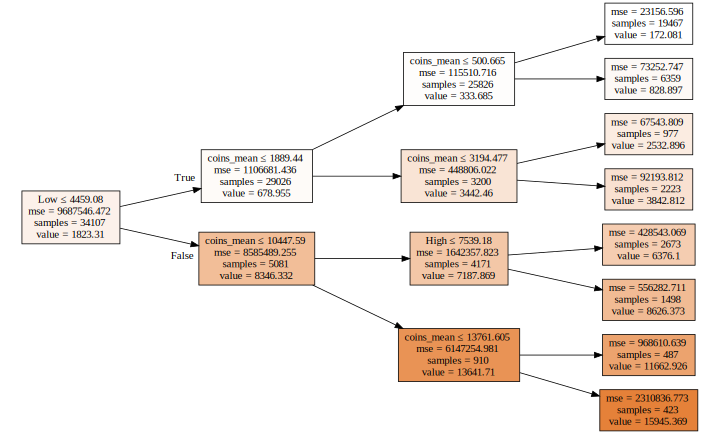

In [38]:
draw_tree(regr.estimators_[0], x_train1, precision=3)

In [24]:
df

Date  Symbol     High      Low    Close       Volume  \
0      1554336000000000000       0  4977.20  4939.53  4940.89    17.553291   
1      1554332400000000000       0  5113.50  4800.00  4976.94  2331.356847   
2      1554328800000000000       0  5266.70  4975.00  5113.50  1632.587373   
3      1554325200000000000       0  5346.68  5180.04  5188.41   350.507383   
4      1554321600000000000       0  5319.81  5140.62  5293.76  1005.936609   
5      1554318000000000000       0  5176.30  5128.49  5140.62   152.446212   
6      1554314400000000000       0  5188.92  5124.70  5140.38   165.682350   
7      1554310800000000000       0  5185.57  5076.60  5128.64   456.049133   
8      1554307200000000000       0  5147.07  5012.74  5123.26  1519.102254   
9      1554303600000000000       0  5029.37  5000.00  5012.75   104.733399   
10     1554300000000000000       0  5042.81  4998.22  5012.76   153.085203   
11     1554296400000000000       0  5047.87  5000.99  5038.59   155.903012   
12     1554292800000000000       0  5029.90  4968.02  5008.68   202.433678   
13     1554289200000000000       0  4986.69  4947.82  4968.02    56.949998   
14     1554285600000000000       0  4981.89  4946.77  4953.51   182.322689   
15     1554282000000000000       0  4975.00  4929.67  4975.00   175.355648   
16     1554278400000000000       0  4970.61  4925.26  4957.82    46.760539   
17     1554274800000000000       0  4991.48  4949.03  4962.68    49.277221   
18     1554271200000000000       0  4977.67  4930.03  4974.55    59.234677   
19     1554267600000000000       0  4970.98  4915.93  4955.82    68.244038   
20     1554264000000000000       0  5055.00  4869.24  4915.93   803.484000   
21     1554260400000000000       0  5089.99  4987.00  5055.00   362.503746   
22     1554256800000000000       0  5076.00  4963.58  5072.45   380.983647   
23     1554253200000000000       0  4988.83  4925.00  4970.00   208.411100   
24     1554249600000000000       0  4997.66  4896.67  4978.97   531.882947   
25     1554246000000000000       0  4946.60  4812.84  4903.80   696.056079   
26     1554242400000000000       0  4829.42  4786.84  4829.42    68.397213   
27     1554238800000000000       0  4838.51  4769.54  4789.14   174.203709   
28     1554235200000000000       0  4827.97  4740.00  4804.96   488.695889   
29     1554231600000000000       0  4772.18  4732.99  4765.83   136.682420   
...                    ...     ...      ...      ...      ...          ...   
67626  1527098400000000000       3   287.38   280.11   285.99   272.837876   
67627  1527094800000000000       3   291.76   275.01   282.32   307.983340   
67628  1527091200000000000       3   298.75   287.00   291.76   264.487790   
67629  1527087600000000000       3   312.40   296.07   298.75   324.513999   
67630  1527084000000000000       3   319.05   310.00   311.81    40.387554   
67631  1527080400000000000       3   321.00   318.64   319.05   170.447368   
67632  1527076800000000000       3   319.11   311.00   318.89    22.314299   
67633  1527073200000000000       3   314.30   308.62   311.00    13.424132   
67634  1527069600000000000       3   315.74   308.91   314.30     9.428592   
67635  1527066000000000000       3   317.98   308.00   308.91   247.536344   
67636  1527062400000000000       3   312.48   307.63   308.56    27.703667   
67637  1527058800000000000       3   325.29   305.01   308.99   468.686938   
67638  1527055200000000000       3   326.19   318.18   325.29    21.243889   
67639  1527051600000000000       3   323.52   318.00   319.14    47.457538   
67640  1527048000000000000       3   331.97   320.88   323.52   210.551356   
67641  1527044400000000000       3   333.36   325.93   325.93   187.839224   
67642  1527040800000000000       3   334.99   321.41   333.36   725.107102   
67643  1527037200000000000       3   334.03   307.06   321.88   859.420563   
67644  1527033600000000000       3   316.33   311.00   312.88   148.296678   
67645  1527030000000000000       3   315.82 

In [25]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 1000  
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(crypto_data, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((66656, 7), (66656,), (1000, 7))

In [26]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [27]:
df_trn, y_trn, nas = proc_df(crypto_data, 'Open', subset=5000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [28]:
df_trn

Date  Symbol     High      Low    Close      Volume  \
3      1554325200000000000       0  5346.68  5180.04  5188.41  350.507383   
9      1554303600000000000       0  5029.37  5000.00  5012.75  104.733399   
14     1554285600000000000       0  4981.89  4946.77  4953.51  182.322689   
24     1554249600000000000       0  4997.66  4896.67  4978.97  531.882947   
30     1554228000000000000       0  4739.00  4725.58  4738.99  119.955081   
32     1554220800000000000       0  4749.98  4719.27  4736.80  280.194980   
34     1554213600000000000       0  4803.00  4670.00  4748.28  535.827868   
42     1554184800000000000       0  4772.23  4649.49  4719.65  950.230731   
54     1554141600000000000       0  4135.00  4127.92  4133.04   48.919953   
65     1554102000000000000       0  4130.00  4118.39  4122.00   32.345557   
79     1554051600000000000       0  4090.02  4086.14  4089.09   28.704900   
80     1554048000000000000       0  4090.61  4087.22  4090.02   18.550392   
84     1554033600000000000       0  4100.00  4083.99  4085.99  148.033952   
109    1553943600000000000       0  4082.00  4069.58  4082.00   13.198401   
111    1553936400000000000       0  4082.00  4077.17  4080.82    7.841803   
150    1553796000000000000       0  4014.14  4008.32  4013.92   99.610119   
158    1553767200000000000       0  4010.73  4003.80  4003.80   23.385095   
175    1553706000000000000       0  4011.35  4003.93  4010.07  211.235584   
184    1553673600000000000       0  3984.00  3976.57  3984.00    8.695324   
187    1553662800000000000       0  3992.30  3974.87  3991.13   21.394602   
191    1553648400000000000       0  3978.98  3930.50  3966.90  184.087459   
241    1553468400000000000       0  3973.50  3966.70  3971.53   26.250474   
250    1553436000000000000       0  3978.44  3971.96  3974.01   15.592095   
259    1553403600000000000       0  3971.86  3965.00  3965.00   11.821124   
270    1553364000000000000       0  3973.88  3969.41  3972.83   23.761280   
333    1553137200000000000       0  4033.41  4029.13  4030.64  107.443762   
338    1553119200000000000       0  4048.85  4010.04  4031.24  286.948198   
354    1553061600000000000       0  3989.42  3977.61  3980.68  148.391131   
402    1552888800000000000       0  3959.75  3940.07  3952.76   60.362006   
414    1552845600000000000       0  3971.04  3966.50  3969.00   38.319489   
...                    ...     ...      ...      ...      ...         ...   
67272  1528372800000000000       3   235.94   234.00   235.94    6.196511   
67274  1528365600000000000       3   234.88   234.82   234.82    1.036918   
67290  1528308000000000000       3   228.50   226.96   226.96   12.737567   
67292  1528300800000000000       3   233.91   227.00   227.00  353.059885   
67303  1528261200000000000       3   236.83   235.51   236.83   10.526969   
67311  1528232400000000000       3   239.04   236.98   236.98   21.202752   
67317  1528210800000000000       3   230.70   227.00   230.70   19.821414   
67325  1528182000000000000       3   231.44   230.00   230.00   14.428940   
67330  1528164000000000000       3   237.67   231.00   231.02   43.994631   
67331  1528160400000000000       3   237.43   235.72   237.43    3.883676   
67366  1528034400000000000       3   258.07   255.85   257.82  162.459727   
67397  1527922800000000000       3   250.00   247.15   248.45    6.078153   
67402  1527904800000000000       3   238.88   238.37   238.88    2.295768   
67404  1527897600000000000       3   240.49   239.18   239.18    7.679316   
67417  1527850800000000000       3   239.06   234.17   234.17   32.612310   
67418  1527847200000000000       3   238.47   237.45   238.47    8.785881   
67425  1527822000000000000       3   240.74   238.49   238.49   25.707311   
67430  1527804000000000000       3   244.61   238.29   239.35   90.060648   
67448  1527739200000000000       3   243.22   239.19   243.22   25.603797   
67455  1527714000000000000       3   237.75   236.91   237.45   19.979823   
67500  15275520000

In [29]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\Marcin\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 119 ms
[17.758653028830768, 5.621133635041957, 0.9999670009749642, 0.9820640303123337]


In [30]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[375.2977540665688, 55.46887335741082, 0.9852621885654652, -0.7465287163926977]


In [31]:
??RandomForestRegressor

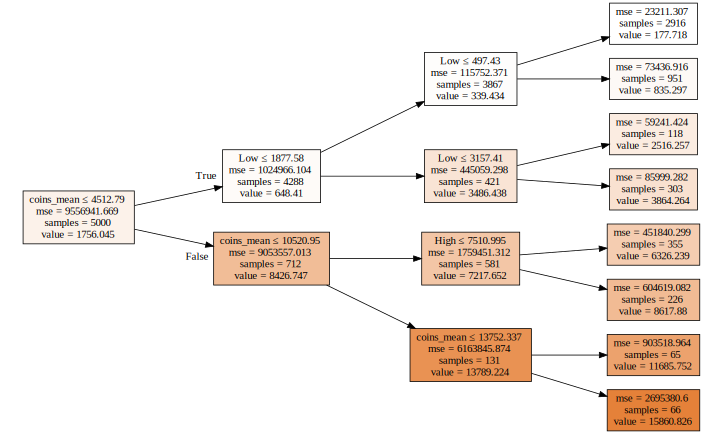

In [32]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [33]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[14.610498788026097, 6.343169086106527, 0.9999776637043284, 0.9771603408987153, 0.9998433027418674]


In [34]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[14.549700061860845, 6.113490392474253, 0.9999778492137732, 0.9787843907001146]
